In [1]:
#import needed libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Gather

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Assessment

In [4]:
# Dimensions of the data set
df.shape

(53940, 10)

In [5]:
# Discover nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
# summary statistics for all numeric columns
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Clean

- Make some column names more descriptive.

In [7]:
# copy of original data set
diamond = df.copy()

In [8]:
def rename ():
    depth,x ,y,z =('prop_depth','lenght' , 'width' ,'depth')
    diamond.rename(columns ={'depth': depth ,'x':x , 'y':y,'z':z} ,inplace = True)
rename()

In [9]:
diamond.head(1)

,carat,cut,color,clarity,prop_depth,table,price,lenght,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


### Exploratory Descriptive analysis (Univariate)

### How the cut categories are distributed ?

In [10]:
# convert all ordinal categorical vars from object to catergory type
def order():
    new_order = {'cut':['Fair','Good','Very Good','Premium','Ideal'] ,
        'color':['J', 'I', 'H', 'G', 'F', 'E', 'D'],
        'clarity' :['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}
    for var in new_order :
        ordered = pd.api.types.CategoricalDtype(ordered = True , categories = new_order[var])
        diamond[var] = diamond[var].astype(ordered)
        
order()            

Text(0.5, 1.0, 'bar chart for cut qulity levels')

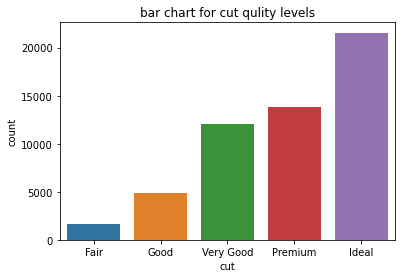

In [27]:
# Exploratory plot
sb.countplot(data = diamond , x= 'cut')
plt.title('bar chart for cut qulity levels')

In [34]:
# use value_counts to get the value of each bar
diamond['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

### Comment 
**The highest production is from the ideal cut quality which is the highest cut quality level**

### How the clarity categories are distributed ?

Text(0.5, 1.0, 'bar chart for diamond clarity levels')

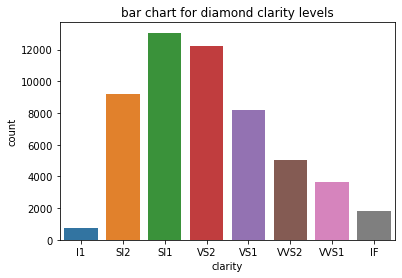

In [26]:
# Exploratory bar chart
sb.countplot(data= diamond , x ='clarity')
plt.title('bar chart for diamond clarity levels')

In [33]:
# get the numeric value of each bar
diamond['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

### Comment
**SI1 and VS2 are the most produced diamonds repectively , while IF(highest clarity level) occupies the seventh production level** 

### How is the color distribution ?

Text(0.5, 1.0, 'bar chart for  diamond color scale')

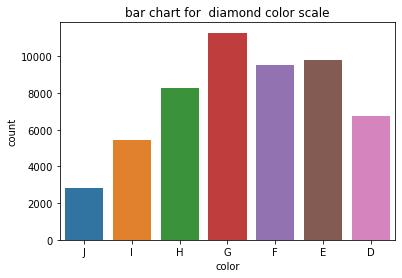

In [25]:
# Exploratory bar chart
sb.countplot(data = diamond , x ='color')
plt.title('bar chart for  diamond color scale')

In [35]:
# get the numeric value of each bar
diamond['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

### Comment
**G color scale is the most produced , while D (colorless) occupies the fifth production level**

### Note :
**From the distribution of the three previous variables (cut , clarity and color):**
- it was obvious that the production of the highest quality scale was met only in cut variable (ideal was the most produced ).

- for the other two variables ( clarity and color) , lesser quality scales were the most produced.

- so it might be a commercial convension that brightness of the produced piece(affected by it's cut) has strong impact on diamond market ,in addition cut object to human factor unless clarity and color which subject to natural factors.

### How the weight is distributed ?

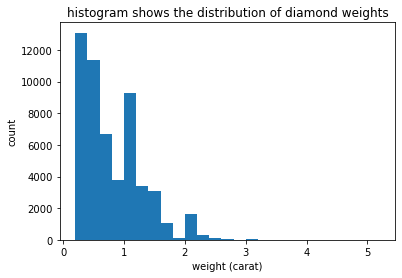

In [24]:
# Exploratory histogram
bins = np.arange(diamond['carat'].min() , diamond['carat'].max()+0.2 ,0.2 )
plt.hist(data = diamond , x ='carat' , bins = bins)
plt.xlabel('weight (carat)')
plt.ylabel('count')
plt.title('histogram shows the distribution of diamond weights');


### Comment 
- we have three spikes [0.2:0.4] ,[0.4:0.6] ,[1:1.2] carats, are the most produced weights respetively .

- generally It seems that diamond market follows lite-weight trend unlike other markets like gold which tends to deal with much heavier weights.

### Exploratory  Desceriptive analysis (Bivariate)

### How the cut quality affects the price ?

Text(0.5, 1.0, 'box plot depicting diamond cut-price relationship')

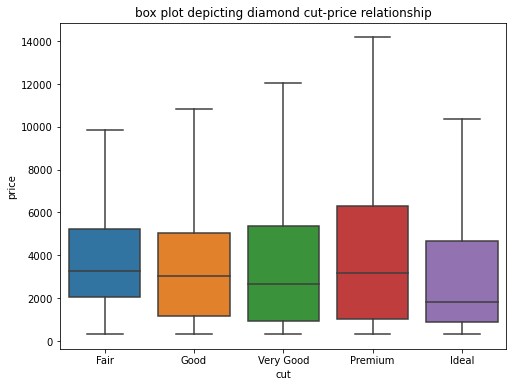

In [23]:
# Exploratory boxplot
plt.figure(figsize=[8,6])
sb.boxplot(data = diamond , y='price', x='cut' ,showfliers = False)
plt.title('box plot depicting diamond cut-price relationship')

### Comment

- Although ideal cut was the most produced and is the highest cut quality level (that's why i'm curious to see it's impact on price) but it doesn't occupy the hight prices and it has the lowest median .

- in general we can see lower qualities occupy higher prices in some points which means there is no absolute direct relationship between cut quality and price and another factors play role.


### What is the relationship between cut and weight ?

Text(0.5, 1.0, 'violin plot depicting diamond cut-weight relationship')

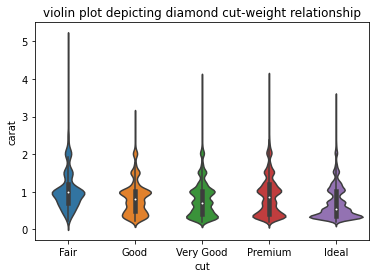

In [22]:
# Exploratory violinplot
sb.violinplot(data = diamond, x ='cut' , y='carat')
plt.title('violin plot depicting diamond cut-weight relationship')

### Comment
- It's obvious here that ideal has the widest bottom which means the majority of lite-weight dimanods fall into it(almost 0.5 carat weight) , which answers why ideal cuts didn't occupy the highest prices in the previous plot.

- so weight plays role in the relationship between cut quality and price.

### How strong the relationship between price and weight ?

Text(0.5, 1.0, 'scatter polt depicting diamond weight-price relationship')

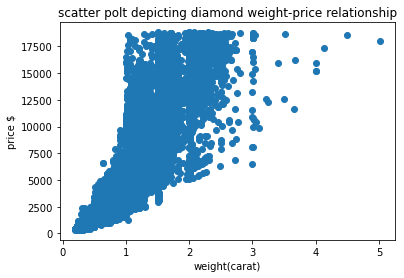

In [21]:
# Exploratory scatter plot
plt.scatter(data = diamond , x ='carat' , y= 'price')
plt.xlabel('weight(carat)')
plt.ylabel('price $')
plt.title('scatter polt depicting diamond weight-price relationship')

### Comment
- There is strong , positive relationship between weight and price but interestingly we can observe there are heavy weight diamonds have the same high price  like lite ones . 

- again other factors play role in the relationship between price and weight .

- may by the cut quality role comes here as the lite-high price pieces fall in high cut quality level while heavier pieces come in the same price rank becase they are of low quality scale.

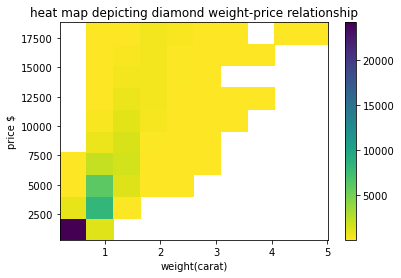

In [20]:
# exploratory heat map for relationship between price and weight
# alternative to scatter plot
plt.hist2d(data = diamond , x= 'carat' , y= 'price' , cmin=0.5 ,cmap='viridis_r')
plt.colorbar()
plt.xlabel('weight(carat)')
plt.ylabel('price $')
plt.title('heat map depicting diamond weight-price relationship');

### Exploratory Descriptive analysis (multivariate)

### What is the relationship between price , weight and cut quality ?

Text(0.5, 1.0, 'scatter plot for diamond weight-price relationship')

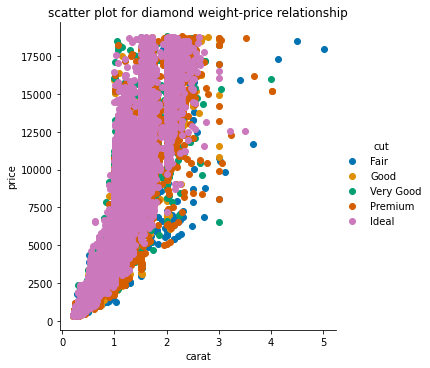

In [28]:
# Exploratory scatter plot with cut levels presented by colors
g = sb.FacetGrid(data = diamond, hue = 'cut', height = 5,
                 palette = 'colorblind')
g.map(plt.scatter, 'carat', 'price')

g.add_legend()
plt.title('scatter plot for diamond weight-price relationship')

### Comment
- The scatter plot answers and conclude the mutual relationships between price , weight and cut.

- as we see ideal level is the most produced mainly in weights less than 2 carats with increasing price along with weight incease.

- with heavier weights we see other levels come in with various prices depending on it's quality level and weight together.

## Diamond price doesn't depend on one factor only ,but it's complex ,mutual relationships.